# Early Prediction of Sepssis from Clinical Data

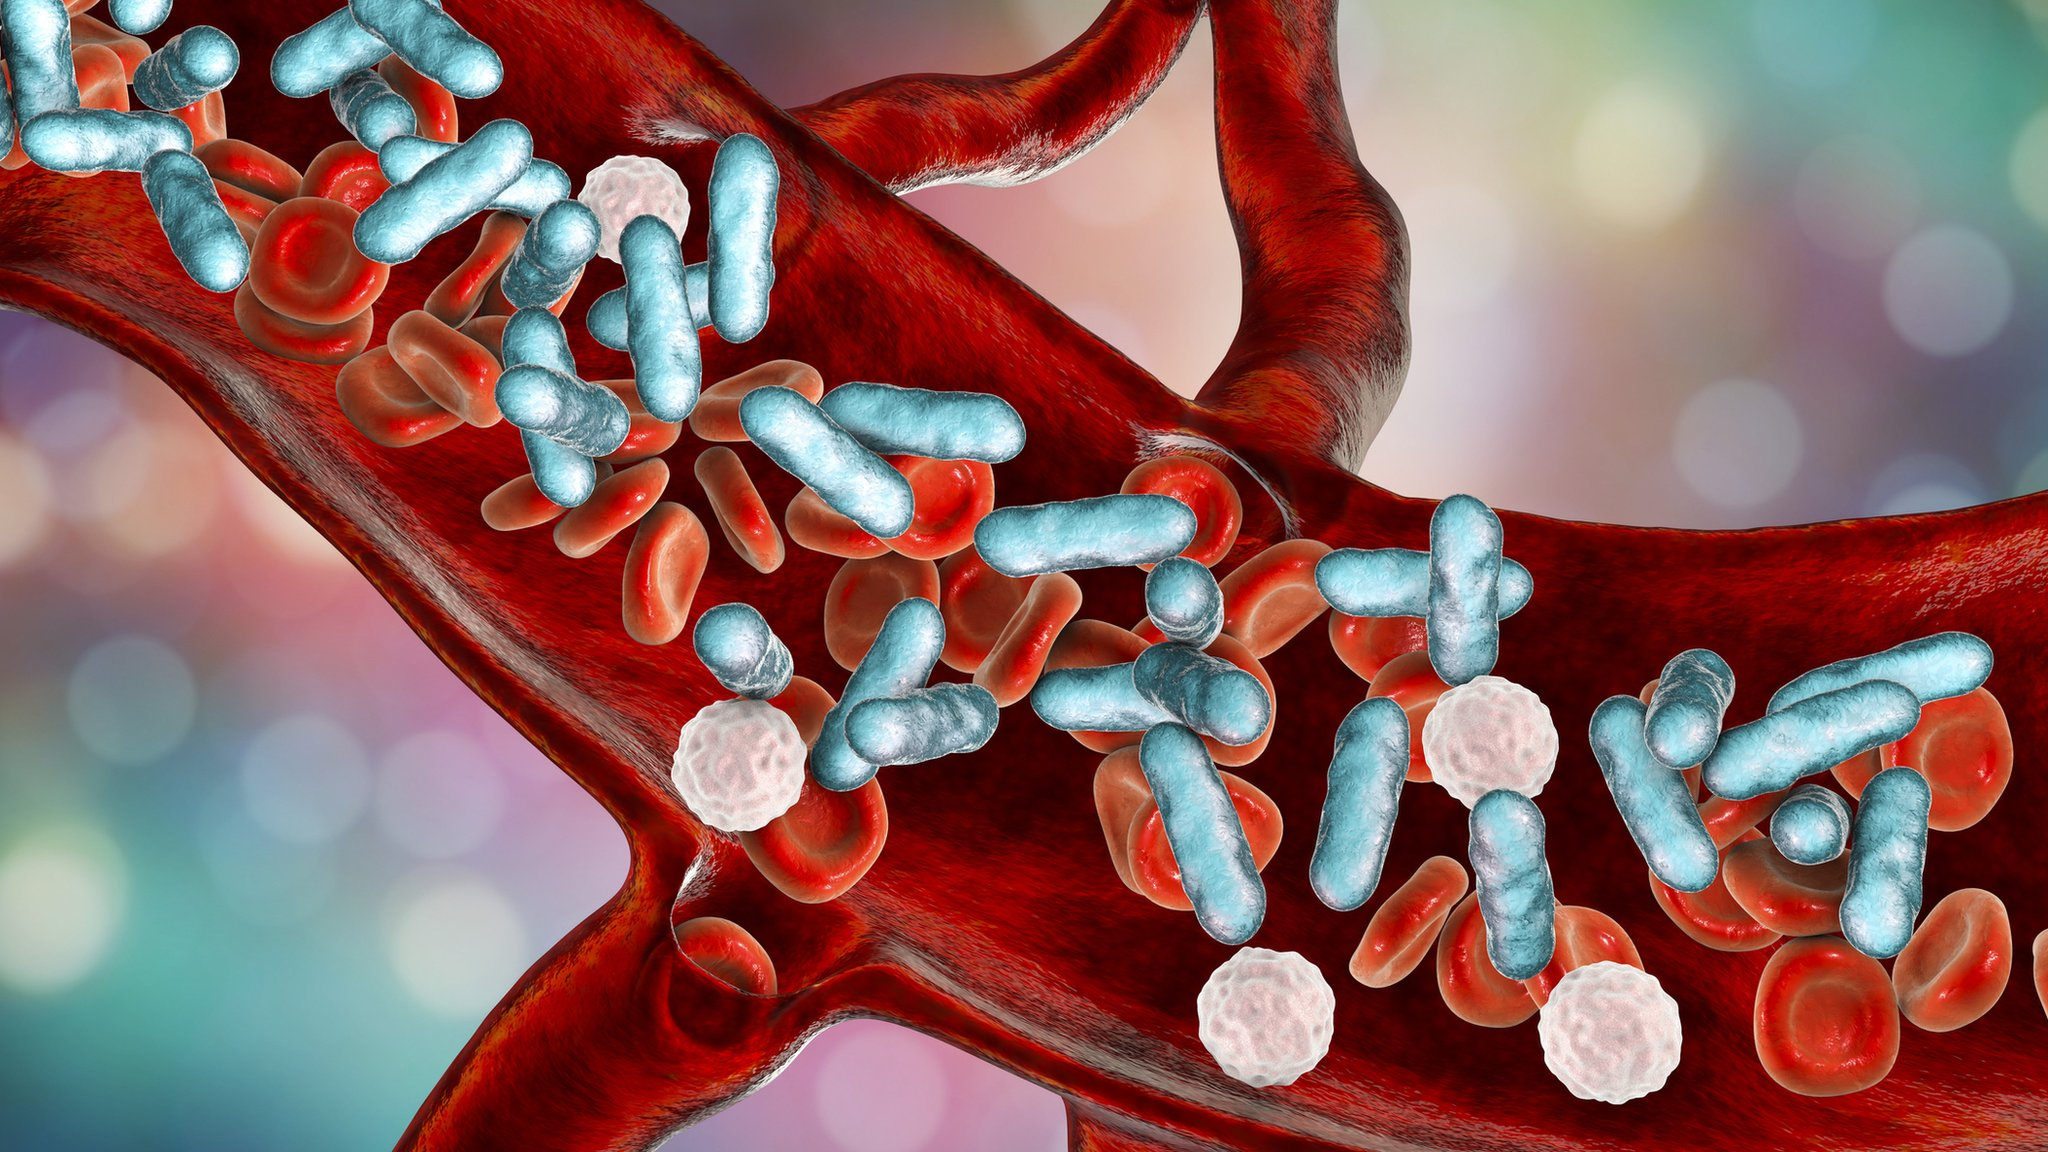

# Introduction

Sepsis is a life-threatening condition that occurs when the body’s response to infection causes tissue damage,organ failure, or death. About 30 millions people develop sepsis and one-fifth of them die from the disease every year around the world. Detecting sepsis early and starting immediate treatment often save patients lives.

# Project Goal
 The goal of this project is to early detect sepsis (6 hours ahead) using physiological data. 
 The inputs are patients' information, including vital signs, laboratory values and demographics. 
 The output is the results whether the model predicts non-Sepsis patients or Sepsis patients six hours ahead of clinical onset time.

# Imported Packages and Modules

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#statistics
import scipy.stats as stats

# Preprocessing and Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder

# Models
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Exports
import os, pickle


# Loaded dataset

In [2]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_train = pd.read_csv('Paitients_Files_Train.csv')


# Hypothesis

H0: The sample has a Gaussian distribution in the numerical feautures.

H1: The sample does not have a Gaussian distribution in the numerical feautures.

# Questions

1. How many patients have the tendency of developing sepsis?
2. Which age group are more prone to developing sepsis?
3. Does having an insurance enhance patients chances of getting sepsis?
4. Is body mass directly correlated with a patients tendency to get sepsis?
5. Does the blood parameters associated with sepsis?

In [3]:
# Check the shapes 
df_test.shape, df_train.shape


((169, 10), (599, 11))

In [4]:
df_train

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]

In [5]:
df_train.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [6]:
df_test

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1
167  ICU200776    1  126  60   0    0  30.1  0.349   47          1
168  ICU200777    1   93  70  31    0  30.4  0.315   23          1

[169 rows x 10 columns]

In [7]:
# Information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
# checking for missing values in the train dataset
df_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
# checking for missing values in the test dataset
df_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [10]:
# checking for missing values in the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
# check for duplicated values
df_train.duplicated().sum()

0

In [12]:
# Statiscally overview of the dataset
df_train.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    1.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

In [13]:
# Check of outliers by applying the IQR method checking on the train dataset
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()

PRG    True
PL     True
PR     True
SK     True
TS     True
M11    True
BD2    True
Age    True
dtype: bool

In [14]:
# box plot for checking outliers
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Sepssis']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 8, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=df_train, x='Sepssis', y=p, ax=ax[i], palette= color,whis = 1.5)
        ax[i].set_title(p)



The results above demonstrate they are outliers in the numerical features

# Trim the outliers

we used trimming to remove the bad data from our dataset

In [15]:
numerical_features = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
df = df_train[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [16]:
df_trim = df_train.copy()

In [17]:
def iqr_trimming(df_train, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df_train[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [18]:
dropped = np.unique(iqr_trimming(df_trim, numerical_features, 1.5))

In [19]:
df_trim.drop(dropped, inplace=True)

In [20]:
df_trim.shape

(493, 11)

In [21]:
df_train.shape

(599, 11)

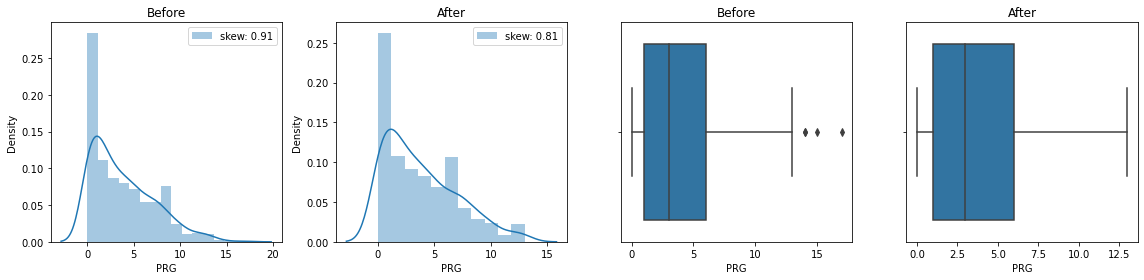

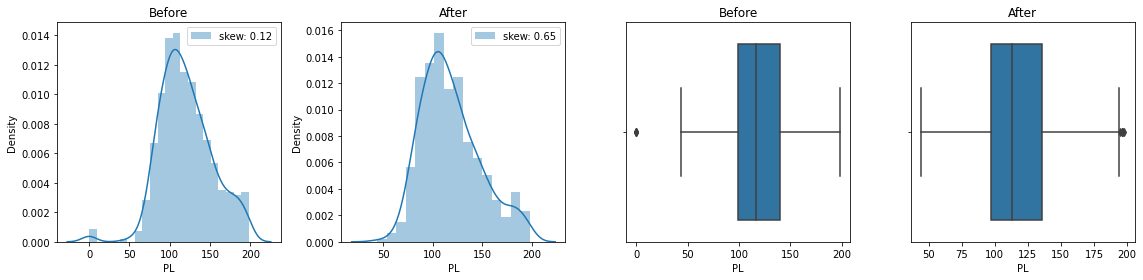

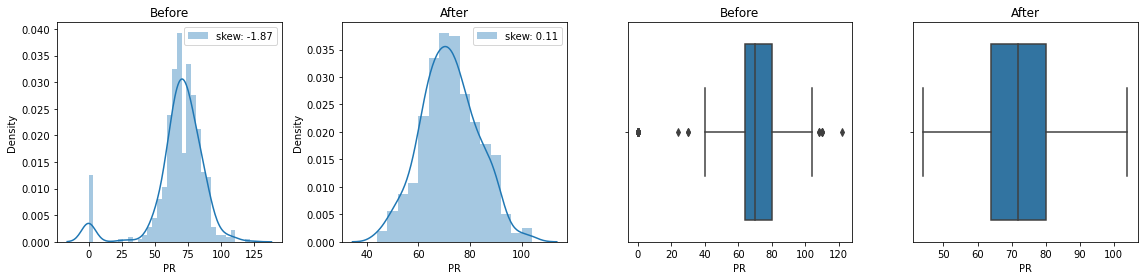

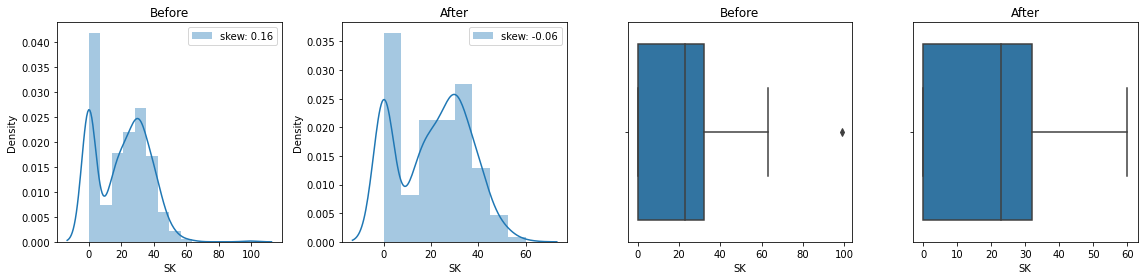

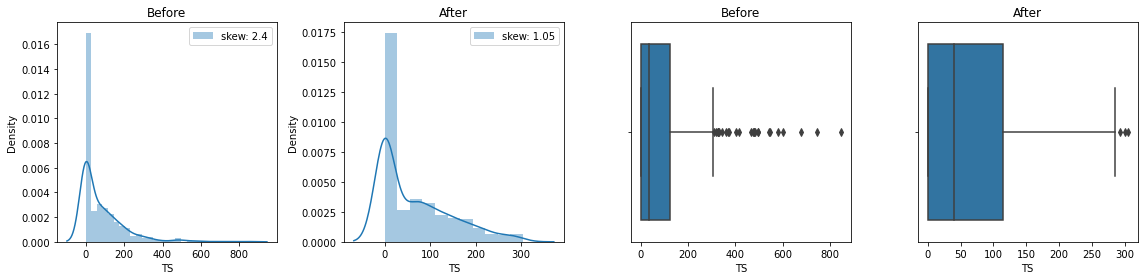

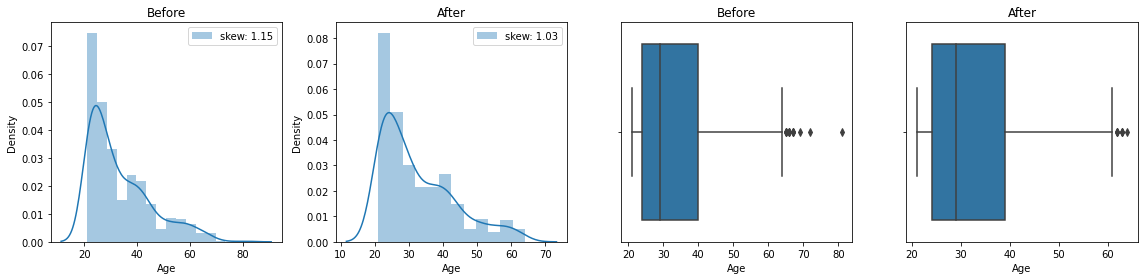

In [22]:
for col in numerical_features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

# Exploratory Data Analysis

# Bivariate Analysis

In [23]:
# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = df_train.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df_train[col], hue='Sepssis', data=df_train, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()

# Multivariate Analysis

<AxesSubplot:>

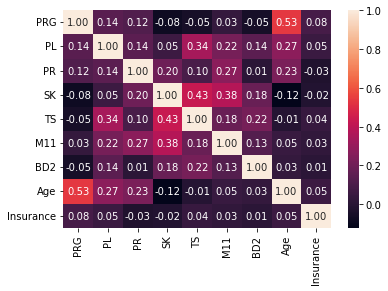

In [24]:
# correlation heatmap df
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [25]:
sns.pairplot(df_train,vars = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], hue="Sepssis")

# Hypothesis validation

Statistical Normality Tests
Normality tests are used to determine if a dataset is normally distributed about the mean value. it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

on the other hand, Gaussian distribution is a continuous probability distribution with symmetrical sides around its center. Its mean, median and mode are equal.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are  eight numerical features in this dataset - PRG, PL, PR, SK, TS, M11, BD2, Age.

# D’Agostino’s K^2 Test

# PRG

In [60]:
stat, p = stats.normaltest(df_train['PRG'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=65.49338, p=0.000
Sample does not look Gaussian (reject H0)


# PL

In [61]:
stat, p = stats.normaltest(df_train['PL'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=10.08525, p=0.006
Sample does not look Gaussian (reject H0)


# BD2

In [62]:
stat, p = stats.normaltest(df_train['BD2'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=266.81137, p=0.000
Sample does not look Gaussian (reject H0)


# 1. How many patients have the tendency of developing sepsis?
208 patient have the tendency of developing sepsis

In [26]:
sep  = df_train.groupby('Sepssis', as_index=False)['ID'].count()


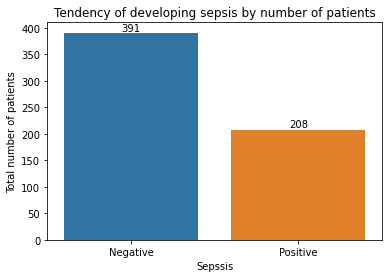

In [27]:
splot = sns.barplot(data=sep, y='ID', x='Sepssis')
plt.xlabel("Sepssis")
plt.ylabel("Total number of patients")
plt.title('Tendency of developing sepsis by number of patients')
plt.bar_label(splot.containers[0], size=10)
plt.show()

# 2.  Which age group are more prone to developing sepsis?
People between 20-30 years have higher tendency of getting sepsis.
Our Null hypothesis is therefore False and the alternate hypothesis proven true

In [28]:
#age group count of patients with sepsis

age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
age_group

Age  ID
0    21   5
1    22   6
2    23   6
3    24   6
4    25  12
5    26   6
6    27   5
7    28  10
8    29  13
9    30   5
10   31  10
11   32   8
12   33   9
13   34   1
14   35   5
15   36   7
16   37   5
17   38   8
18   39   3
19   40   2
20   41  13
21   42   4
22   43   7
23   44   4
24   45   5
25   46   6
26   47   3
27   49   2
28   50   1
29   51   5
30   52   4
31   53   3
32   54   3
33   55   1
34   56   2
35   57   1
36   58   3
37   59   2
38   60   2
39   61   1
40   62   2
41   66   1
42   67   1

In [29]:
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')

Text(0.5, 1.0, 'Age group of patients with sepsis')

# 3. Does having an insurance enhance patients chances of getting sepsis?
No, majority of patients with insurance have no tendency of developing sepsis

In [30]:
insured = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
insured.plot(kind='bar', x='Sepssis', y='ID')
plt.ylabel('Count of Insurance')
plt.title('Insurance of all patients')

Text(0.5, 1.0, 'Insurance of all patients')

# 4. Is body mass directly correlated with a patients tendency to get sepsis?
Per the histogram used to visualize the data, majority of sepsis patient are between a body mass of 30-40. However, there are even a greater number of people with the same body mass without sepsis hence it cannot be concluded that the tendency of a patient getting sepsis is correlated with their body weight. 

In [31]:
body_mass = df_train.groupby(['Sepssis', 'M11'], as_index=False)['ID'].count()

In [32]:
hist1 = body_mass[body_mass.Sepssis == 'Positive']
hist2 = body_mass[body_mass.Sepssis == 'Negative']

Text(0.5, 1.0, 'Body mass of patient with Sepsis')

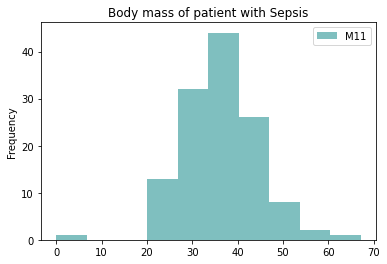

In [33]:
hist1.plot(kind='hist', column = 'M11', bins = 10, color = 'teal', \
           alpha = 0.5 )
plt.title('Body mass of patient with Sepsis')


Text(0.5, 1.0, 'Body mass of patient without Sepsis')

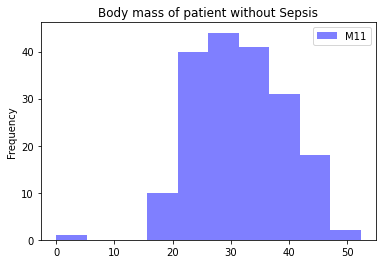

In [34]:
hist2.plot(kind='hist', column = 'M11', bins = 10, color = 'blue', \
            alpha = 0.5)
plt.title('Body mass of patient without Sepsis')

# 5. Does the blood parameters associated with sepsis?

The plot below shows that blood is affected by sepssis

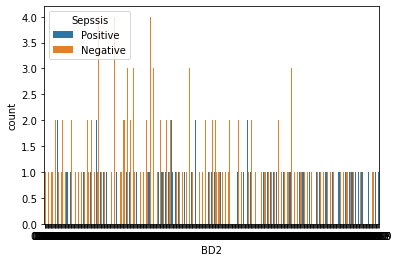

In [35]:
sns.countplot(data = df_train, 
              x = 'BD2', hue = 'Sepssis')
plt.show()

# Data preprocessing and Engineering


# Data Imbalance Check

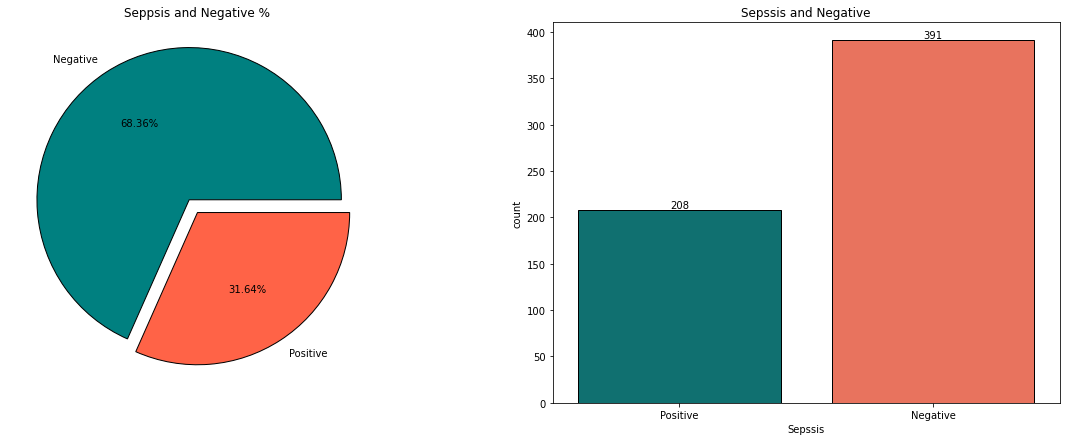

In [36]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

l1 = list(df_trim['Sepssis'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Negative','Positive'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Seppsis and Negative %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df_train, 
                   x='Sepssis',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Positive','Negative'])
    
plt.title('Sepssis and Negative')
plt.show()

In [37]:
categoric_columns = ['ID']
numeric_columns =  [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']



In [38]:
# Label Encoder on the target column
le = LabelEncoder()
df=df_trim
df[['Sepssis']] = df[['Sepssis']].apply(le.fit_transform) 
X = df.drop('Sepssis', axis=1)
y = df['Sepssis']

# Categorical Encoding

In [39]:
# Encode the categorical variables in the train data
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
Encoded_train = encoder.fit_transform(df_trim[categoric_columns])

# Scaling

In [40]:
X = df_trim.drop('ID', axis=1) #train data

In [41]:
# Scaling on train dataset
Scaler = MinMaxScaler()
train = Scaler.fit(X).set_output(transform="pandas")
scaled_train = train.transform(X)

In [42]:
# join the scaled and encoded data
train_data = pd.concat([scaled_train, Encoded_train], axis=1)


In [43]:
#Resampling the minority of the target variable using smote
X = train_data.drop(columns=["Sepssis"])
y = train_data["Sepssis"]

smote = SMOTE(sampling_strategy="minority")
X, y = smote.fit_resample(X, y)
y.value_counts()

1.0    337
0.0    337
Name: Sepssis, dtype: int64

In [44]:
# Split the dataframe into train and eval
X_train, X_eval, y_train, y_eval=train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# Model Building

In [45]:

# Define the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
KNN_model =  KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=42)


# Fit the models
logreg = logreg_model.fit(X_train, y_train)
rf = rf_model.fit(X_train, y_train)
gb = gb_model.fit(X_train, y_train)
KNN = KNN_model.fit(X_train,y_train)
dt = dt_model.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg.predict(X_eval)
rf_preds = rf.predict(X_eval)
gb_preds = gb.predict(X_eval)
KNN_preds = KNN.predict(X_eval)
dt_preds = dt.predict(X_eval)



# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_eval, logreg_preds)
rf_accuracy = accuracy_score(y_eval, rf_preds)
gb_accuracy = accuracy_score(y_eval, gb_preds)
KNN_accuracy = accuracy_score(y_eval, KNN_preds)
dt_accuracy = accuracy_score(y_eval, dt_preds)


logreg_precision = precision_score(y_eval, logreg_preds)
rf_precision = precision_score(y_eval, rf_preds)
gb_precision = precision_score(y_eval, gb_preds)
KNN_precision = precision_score(y_eval, KNN_preds)
dt_precision = precision_score(y_eval, dt_preds)


logreg_recall = recall_score(y_eval, logreg_preds)
rf_recall = recall_score(y_eval, rf_preds)
gb_recall = recall_score(y_eval, gb_preds)
KNN_recall = recall_score(y_eval, KNN_preds)
dt_recall = recall_score(y_eval, dt_preds)


logreg_f1 = f1_score(y_eval, logreg_preds)
rf_f1 = f1_score(y_eval, rf_preds)
gb_f1 = f1_score(y_eval, gb_preds)
KNN_f1 = f1_score(y_eval, KNN_preds)
dt_f1 = f1_score(y_eval, dt_preds)


logreg_roc_auc = roc_auc_score(y_eval, logreg_preds)
rf_roc_auc = roc_auc_score(y_eval, rf_preds)
gb_roc_auc = roc_auc_score(y_eval, gb_preds)
KNN_roc_auc = roc_auc_score(y_eval, KNN_preds)
dt_roc_auc = roc_auc_score(y_eval, dt_preds)











In [46]:
compare_models = ['Logistic Regression','Random forest','Gradient Boosting','KNearestNeighborsClassifier','Decision Tree Classifier',]

data={'Accuracy':[logreg_accuracy,rf_accuracy,gb_accuracy,KNN_accuracy,dt_accuracy],
      'Recall':[logreg_recall,rf_recall,gb_recall,KNN_recall,dt_recall],
      'Precision':[logreg_precision,rf_precision,gb_precision,KNN_precision,dt_precision], 
      'f1_score':[logreg_f1,rf_f1,gb_f1,KNN_f1,dt_f1],
      'ROC_AUC':[logreg_roc_auc,rf_roc_auc,gb_roc_auc,KNN_roc_auc,dt_roc_auc],
      'Description':['','best model','','','']}
result= pd.DataFrame(data=data, index=compare_models)
result

Accuracy    Recall  Precision  f1_score  \
Logistic Regression          0.866667  0.865672   0.865672  0.865672   
Random forest                0.881481  0.850746   0.904762  0.876923   
Gradient Boosting            0.859259  0.820896   0.887097  0.852713   
KNearestNeighborsClassifier  0.496296  1.000000   0.496296  0.663366   
Decision Tree Classifier     0.829630  0.791045   0.854839  0.821705   

                              ROC_AUC Description  
Logistic Regression          0.866659              
Random forest                0.881255  best model  
Gradient Boosting            0.858977              
KNearestNeighborsClassifier  0.500000              
Decision Tree Classifier     0.829346

In [47]:
kf_RF = KFold(n_splits = 5,shuffle=True)


In [48]:
# Hyperparameter Tuninng For the best model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]
 
# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}


# make GridSearchCV object
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = kf_RF, verbose = 2 , n_jobs = -1, scoring='f1')
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 65}

In [56]:

RF_model_tuned = RandomForestClassifier(bootstrap = True,
                                    max_depth = None,
                                    max_features = 'log2',
                                    min_samples_leaf = 1,
                                    min_samples_split =  2,
                                    n_estimators = 65)

# performance evaluation the test data
RF_model_tuned.fit(X_train, y_train)
y_pred_grid = RF_model_tuned.predict(X_eval)
print(classification_report(y_pred_grid, y_eval))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        68
         1.0       0.90      0.90      0.90        67

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.90      0.90      0.90       135



In [50]:
# the confusion matrix for the Best Model


fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Grid.best_estimator_.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred_RF, labels=rf_Grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [53]:
# Creating a dictionary of objects to export
# Creating a dictionary of objects to export
exports = {"Labelencoder": le,
           "OneHotEncoder": encoder,
           "scaler": Scaler,
           "model": rf}

# Exporting the dictionary with Pickle
with open("P6_toolkit", "wb") as file:
    pickle.dump(exports, file)